# 2.2 SOO for 1D scalars

We instantiate the objects we need (change the temperature field to a different field if you have saved your field with a different name in steps 1 and 2). We also set some bounds for the sensors to go in.

In [1]:
import numpy as np

from cyclops.object_reader import PickleManager
from cyclops.plotting import PlotManager

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = PlotManager()
true_temp_field = pickle_manager.read_file("results/temp_line_field.pickle")
grid = pickle_manager.read_file("results/temp_line_points.pickle")

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds + np.array([[1], [-1]]) * 0.002

We define the symmetry assumptions we want to force (like in manual 2.1) and the kinds of sensor we want to use. Uncomment the code below to see how you can setup a point sensor or a multi sensor (or use a combination of these). The multisensor is meant to behave like an IR camera or a DIC if you define the systematic error function well enough.

In [2]:
# Setup the symmetry
from cyclops.fields import ScalarField
from cyclops.regressors import CSModel
from cyclops.sensor_suite import SensorSuite, SymmetryManager
from cyclops.sensors import Thermocouple


symmetry_manager = SymmetryManager()
symmetry_manager.set_1D_x(0.01)

# Setup the sensor suite
temps = pickle_manager.read_file("../sensors/k-type-T.pickle")
voltages = pickle_manager.read_file("../sensors/k-type-V.pickle")
sensor = Thermocouple(temps, voltages, 1)
sensors = np.array([sensor] * 5)

# def f(x): return np.zeros(x.shape)
# sensor = PointSensor(0, f, 0.1, np.array([[-5e10], [5e10]]), 1)
# sensors = np.array([sensor]*5)

# def f(x): return np.zeros(x.shape)
# sensor_1 = MultiSensor(0, f, 0.1, np.array([[-5000], [5000]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 1))
# sensors = np.array([sensor_1, sensor, sensor, sensor])

sensor_suite = SensorSuite(ScalarField(CSModel, field_bounds), sensors)

We setup the optimisation and optimise as in 2.1. Remember to look at the optional parameters.

In [3]:
# Setup the experiment
from cyclops.experiment import Experiment
from cyclops.optimisers import PSOOptimiser


optimiser = PSOOptimiser("00:00:10")
experiment = Experiment(true_temp_field, grid, optimiser)
experiment.plan_soo(sensor_suite, sensor_bounds)
res = experiment.design()
(
    proposed_layout,
    true_temps,
    model_temps,
    sensor_values,
) = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  1.532305E+09 |  2.867625E+02
     2 |       60 |  0.48655 |       2 |  0.7026 |  2.03241 |  1.96759 |  1.063117E+05 |  2.867625E+02
     3 |       90 |  0.13996 |       3 |  0.4896 |  2.03196 |  1.98200 |  2.978628E+04 |  8.068521E+01
     4 |      120 |  0.43385 |       2 |  0.6732 |  2.07108 |  1.93240 |  2.934712E+03 |  8.068521E+01
     5 |      150 |  0.25634 |       2 |  0.5649 |  2.09566 |  1.90521 |  4.382689E+02 |  8.068521E+01
     6 |      180 |  0.09195 |       3 |  0.4585 |  2.09395 |  1.91942 |  3.510872E+02 |  8.068521E+01
     7 |      210 |  0.03901 |       3 |  0.4246 |  2.08536 |  1.93678 |  3.267983E+02 |  7.273756E+01
     8 |      240 |  0.01390 |       3 |  0.4087 |  2.07247 |  1.95225 |  2.827503E+02 |  4.984274E+01
     9 |      270 |  0.02104 |       3 |  0.4132 |  2.05870 |  1.96498 | 

We look at the results.

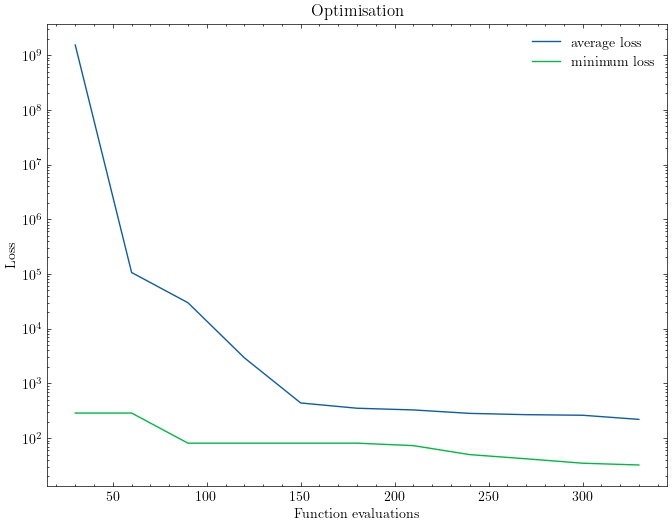

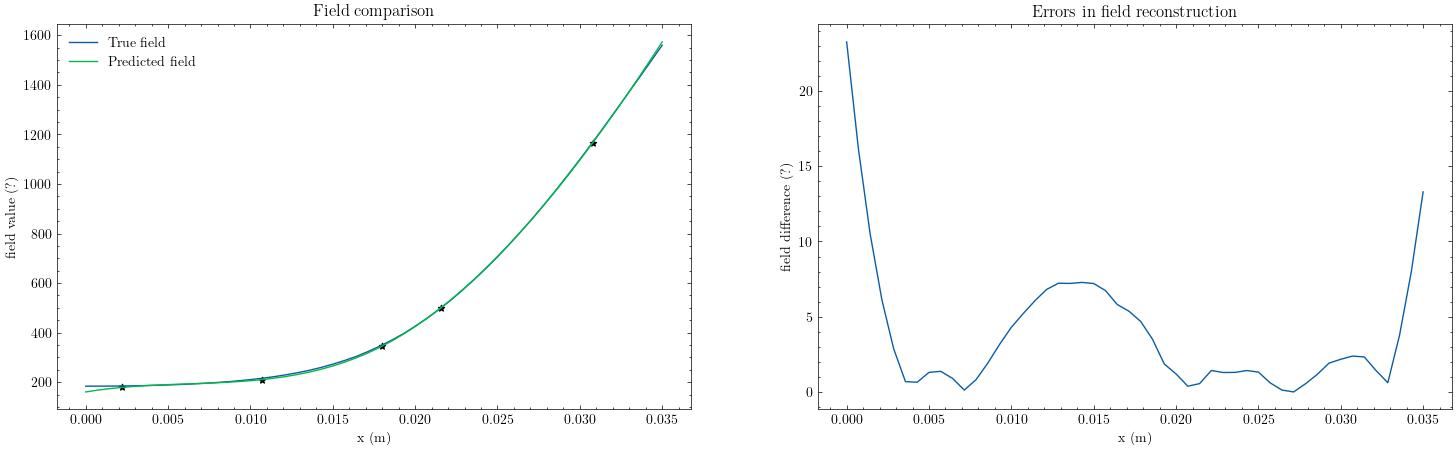

In [4]:
# Display the results
graph_manager.build_optimisation(res.history)
graph_manager.draw()
graph_manager.build_1D_compare(
    grid, proposed_layout, sensor_values, true_temps, model_temps
)
graph_manager.draw()